In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU

In [2]:
max_features = 10000
maxlen = 250

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

Побудова моделі RNN:

In [5]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

In [6]:
model_rnn.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [7]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history_rnn = model_rnn.fit(
                        input_train,
                        y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.3
                        )

Epoch 1/10
137/137 [==============================] - 15s 97ms/step - loss: 0.6806 - acc: 0.5646 - val_loss: 0.6694 - val_acc: 0.5917
Epoch 2/10
137/137 [==============================] - 13s 96ms/step - loss: 0.4813 - acc: 0.7847 - val_loss: 0.4233 - val_acc: 0.8185
Epoch 3/10
137/137 [==============================] - 13s 97ms/step - loss: 0.3406 - acc: 0.8595 - val_loss: 0.3905 - val_acc: 0.8263
Epoch 4/10
137/137 [==============================] - 14s 101ms/step - loss: 0.2756 - acc: 0.8887 - val_loss: 0.4708 - val_acc: 0.7841
Epoch 5/10
137/137 [==============================] - 13s 95ms/step - loss: 0.2073 - acc: 0.9209 - val_loss: 0.4057 - val_acc: 0.8327
Epoch 6/10
137/137 [==============================] - 13s 98ms/step - loss: 0.1456 - acc: 0.9482 - val_loss: 0.4388 - val_acc: 0.8257
Epoch 7/10
137/137 [==============================] - 14s 99ms/step - loss: 0.1029 - acc: 0.9665 - val_loss: 0.4958 - val_acc: 0.8373
Epoch 8/10
137/137 [==============================] - 13s 97m

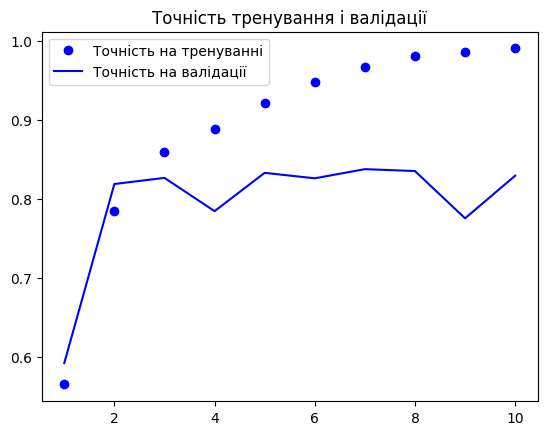

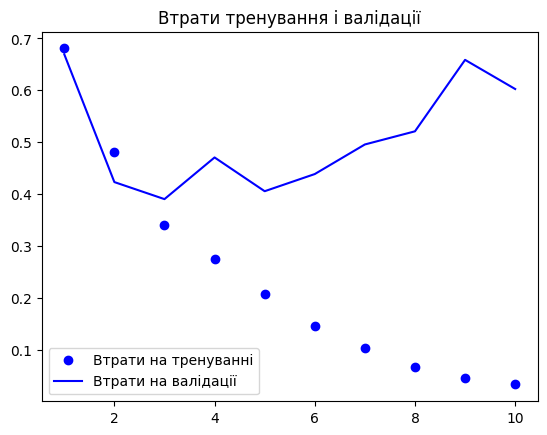

In [9]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [10]:
predictions = model_rnn.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_rnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 15s 19ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 14s 18ms/step - loss: 0.6151 - acc: 0.8267
Test Loss: 0.6151466965675354
Test Accuracy: 0.8266800045967102


Побудова моделі LSTM:

In [11]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

In [12]:
model_lstm.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [13]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history_lstm = model_lstm.fit(
                        input_train,
                        y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.3
                        )

Epoch 1/10
137/137 [==============================] - 32s 215ms/step - loss: 0.6283 - acc: 0.6302 - val_loss: 0.5026 - val_acc: 0.7745
Epoch 2/10
137/137 [==============================] - 27s 198ms/step - loss: 0.3944 - acc: 0.8338 - val_loss: 0.3372 - val_acc: 0.8601
Epoch 3/10
137/137 [==============================] - 28s 204ms/step - loss: 0.2895 - acc: 0.8870 - val_loss: 0.3491 - val_acc: 0.8656
Epoch 4/10
137/137 [==============================] - 27s 196ms/step - loss: 0.2414 - acc: 0.9082 - val_loss: 0.3444 - val_acc: 0.8491
Epoch 5/10
137/137 [==============================] - 27s 194ms/step - loss: 0.2066 - acc: 0.9234 - val_loss: 0.3054 - val_acc: 0.8737
Epoch 6/10
137/137 [==============================] - 30s 222ms/step - loss: 0.1827 - acc: 0.9344 - val_loss: 0.3805 - val_acc: 0.8424
Epoch 7/10
137/137 [==============================] - 31s 228ms/step - loss: 0.1642 - acc: 0.9439 - val_loss: 0.3272 - val_acc: 0.8791
Epoch 8/10
137/137 [==============================] - 3

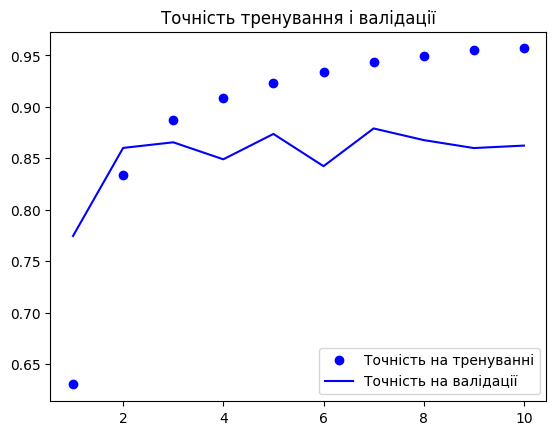

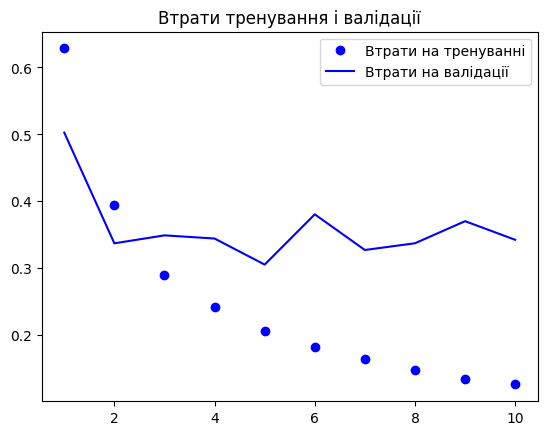

In [15]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [16]:
predictions = model_lstm.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_lstm.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 21s 26ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 20s 25ms/step - loss: 0.3571 - acc: 0.8552
Test Loss: 0.3570666015148163
Test Accuracy: 0.8551599979400635


Побудова моделі BDRn:

In [17]:
model_bdrn = Sequential()
model_bdrn.add(Embedding(max_features, 32))
model_bdrn.add(Bidirectional(LSTM(32)))
model_bdrn.add(Dense(1, activation='sigmoid'))

In [18]:
model_bdrn.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [19]:
model_bdrn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history_bdrn = model_bdrn.fit(
                              input_train,
                              y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.3
                              )

Epoch 1/10
137/137 [==============================] - 66s 443ms/step - loss: 0.6501 - acc: 0.6055 - val_loss: 0.5425 - val_acc: 0.7269
Epoch 2/10
137/137 [==============================] - 46s 338ms/step - loss: 0.4071 - acc: 0.8285 - val_loss: 0.3534 - val_acc: 0.8540
Epoch 3/10
137/137 [==============================] - 53s 388ms/step - loss: 0.2961 - acc: 0.8827 - val_loss: 0.3753 - val_acc: 0.8329
Epoch 4/10
137/137 [==============================] - 60s 440ms/step - loss: 0.2408 - acc: 0.9085 - val_loss: 0.2973 - val_acc: 0.8839
Epoch 5/10
137/137 [==============================] - 52s 380ms/step - loss: 0.2099 - acc: 0.9220 - val_loss: 0.3281 - val_acc: 0.8713
Epoch 6/10
137/137 [==============================] - 53s 385ms/step - loss: 0.1828 - acc: 0.9351 - val_loss: 0.3294 - val_acc: 0.8811
Epoch 7/10
137/137 [==============================] - 45s 331ms/step - loss: 0.1612 - acc: 0.9429 - val_loss: 0.3292 - val_acc: 0.8807
Epoch 8/10
137/137 [==============================] - 5

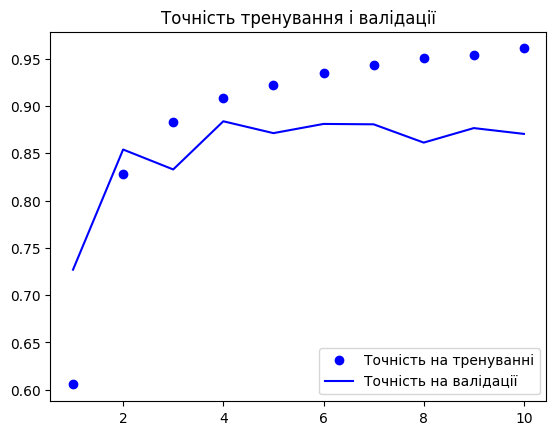

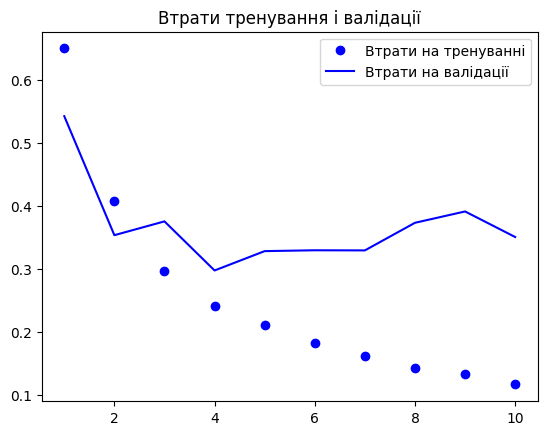

In [21]:
acc = history_bdrn.history['acc']
val_acc = history_bdrn.history['val_acc']
loss = history_bdrn.history['loss']
val_loss = history_bdrn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [22]:
predictions = model_bdrn.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_bdrn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 34s 43ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 34s 43ms/step - loss: 0.3768 - acc: 0.8656
Test Loss: 0.3767660856246948
Test Accuracy: 0.8655999898910522


Побудова моделі Deep:

In [23]:
model_deep = Sequential()
model_deep.add(Embedding(max_features, 32))
model_deep.add(LSTM(32, return_sequences=True))
model_deep.add(LSTM(32))
model_deep.add(Dense(1, activation='sigmoid'))

In [24]:
model_deep.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [25]:
model_deep.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
history_deep = model_deep.fit(
                              input_train,
                              y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.3
                              )

Epoch 1/10
137/137 [==============================] - 62s 421ms/step - loss: 0.6402 - acc: 0.6006 - val_loss: 0.4381 - val_acc: 0.8056
Epoch 2/10
137/137 [==============================] - 51s 373ms/step - loss: 0.3759 - acc: 0.8388 - val_loss: 0.3667 - val_acc: 0.8576
Epoch 3/10
137/137 [==============================] - 55s 400ms/step - loss: 0.2827 - acc: 0.8879 - val_loss: 0.3296 - val_acc: 0.8749
Epoch 4/10
137/137 [==============================] - 51s 376ms/step - loss: 0.2329 - acc: 0.9133 - val_loss: 0.3046 - val_acc: 0.8756
Epoch 5/10
137/137 [==============================] - 57s 417ms/step - loss: 0.2019 - acc: 0.9245 - val_loss: 0.3389 - val_acc: 0.8816
Epoch 6/10
137/137 [==============================] - 51s 375ms/step - loss: 0.1770 - acc: 0.9354 - val_loss: 0.3224 - val_acc: 0.8753
Epoch 7/10
137/137 [==============================] - 55s 400ms/step - loss: 0.1541 - acc: 0.9457 - val_loss: 0.3335 - val_acc: 0.8669
Epoch 8/10
137/137 [==============================] - 5

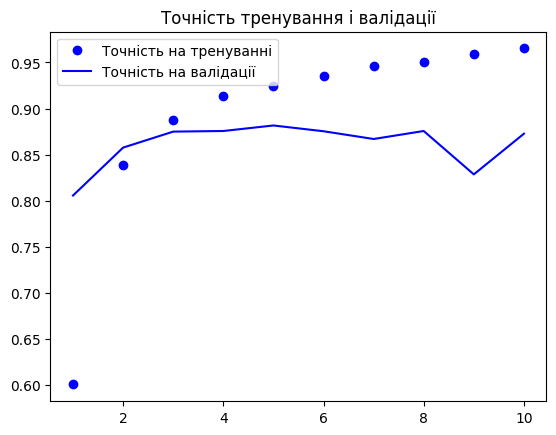

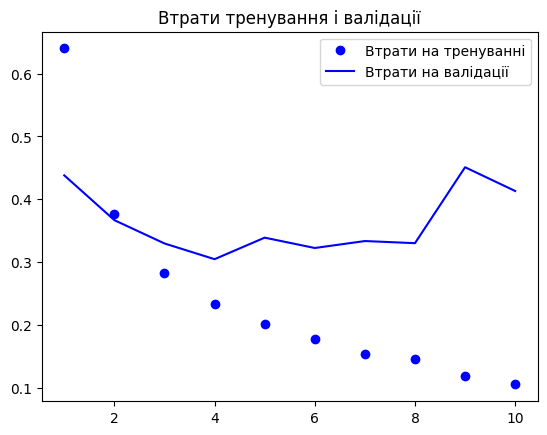

In [27]:
acc = history_deep.history['acc']
val_acc = history_deep.history['val_acc']
loss = history_deep.history['loss']
val_loss = history_deep.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [28]:
predictions = model_deep.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_deep.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 40s 51ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 41s 53ms/step - loss: 0.4613 - acc: 0.8610
Test Loss: 0.4612595736980438
Test Accuracy: 0.8609600067138672


## Висновки:

Загалом, усі три типи моделей - LSTM, Bidirectional та Deep - показують високі результати у класифікації рецензій. Однак Bidirectional та особливо Deep потребують значно більше часу на навчання при однакових умовах та гіперпараметрах. Мені здається, що з урахуванням співвідношення часових витрат на навчання та отриманих результатів, найоптимальнішим вибором для подібних завдань є використання архітектури Long Short-Term Memory (LSTM) для рекурентної нейронної мережі.